# Recurrent neural network (RNN) basics

This `09_rnn_basics` notebook focuses on recurrent neural networks (RNNs), a machine learning architecture for processing sequential data. RNNs are widely used for tasks such as language modeling and time-series prediction. 

The notebook covers building and training a simple RNN model, evaluating its performance, and visualizing its predictions. It also dives into important techniques for handling long sequences and padding, which are essential for dealing with variable-length input data.

## Table of contents

1. [Understanding RNNs](#understanding-rnns)
2. [Setting up the environment](#setting-up-the-environment)
3. [Building a simple RNN model](#building-a-simple-rnn-model)
4. [Training the RNN model](#training-the-rnn-model)
5. [Evaluating the RNN model](#evaluating-the-rnn-model)
6. [Visualizing model predictions](#visualizing-model-predictions)
7. [Handling long sequences and padding](#handling-long-sequences-and-padding)

## Understanding RNNs

Recurrent Neural Networks (RNNs) are a class of neural networks specifically designed to handle sequential data. Unlike traditional feedforward networks, RNNs have a recurrent connection that allows information to persist over time steps, making them well-suited for tasks involving sequences, such as time series prediction, natural language processing (NLP), and speech recognition.

### **Why RNNs?**

RNNs excel in tasks where context and the order of inputs are essential. For instance, in natural language processing, understanding the meaning of a word often depends on the words that precede it in a sentence. Standard neural networks treat inputs independently, which means they lack the ability to capture these sequential relationships. RNNs address this issue by maintaining a hidden state that evolves as it processes each element of the sequence, thereby retaining information about previous inputs.

### **Key concepts of RNNs**

#### **Sequential data and time steps**

In RNNs, the input data typically comes in sequences. Each item in the sequence is referred to as a time step. For example, in a sentence, each word would be one time step. This structure allows RNNs to process one element at a time while maintaining a memory of previous elements, which is essential for understanding context.

#### **Hidden state and recurrence**

The defining feature of RNNs is their ability to maintain a hidden state that evolves over time. At each time step, the hidden state is updated based on both the current input and the hidden state from the previous time step. This recurrence allows RNNs to keep track of information over multiple time steps, making them capable of capturing long-term dependencies in sequences.

#### **Output of the RNN**

At each time step, the RNN generates an output based on the hidden state. The output can be produced at every time step (for tasks like sequence prediction) or only after processing the entire sequence (for tasks like sentiment analysis or sequence classification). The flexibility of producing outputs either at each time step or at the end of the sequence makes RNNs adaptable to a variety of tasks.

#### **The vanishing gradient problem**

One of the challenges RNNs face is the **vanishing gradient problem**. When training RNNs using backpropagation through time (BPTT), the gradients of the loss with respect to the network’s weights can become very small as they are propagated backward through many time steps. This makes it difficult for the network to learn long-range dependencies, as information from earlier time steps may be lost. This issue is particularly problematic for standard RNNs in tasks that require understanding of long-term context.

### **Variants of RNNs**

Several advanced architectures have been developed to address the limitations of standard RNNs, particularly the vanishing gradient problem:

#### **Long Short-Term Memory (LSTM)**

LSTMs are a specialized type of RNN designed to capture long-term dependencies in sequences. They achieve this through a gating mechanism that controls the flow of information within each LSTM cell. LSTMs have three key gates:

- **Forget gate**: Decides which information from the previous cell state should be discarded.
- **Input gate**: Determines which new information should be added to the cell state.
- **Output gate**: Controls what part of the cell state should be output at the current time step.

This gated structure allows LSTMs to preserve information across long sequences, overcoming the vanishing gradient problem and making them highly effective for tasks like language modeling, translation, and time series forecasting.

#### **Gated Recurrent Unit (GRU)**

GRUs are a simplified version of LSTMs. They combine the forget and input gates into a single gate and use fewer parameters, making them less complex but still powerful. GRUs often perform similarly to LSTMs, especially in tasks where sequences are relatively short. Their simpler structure makes them more computationally efficient, which can be advantageous in certain applications.

### **Applications of RNNs**

RNNs are well-suited for tasks that involve sequential or time-dependent data. Some common applications include:

- **Time series forecasting**: RNNs can predict future values in a time series by learning patterns from historical data, making them useful for applications such as stock market prediction, weather forecasting, and anomaly detection.
- **Language modeling and text generation**: In NLP tasks, RNNs can be used to predict the next word in a sentence or generate text based on a given input, making them valuable for applications like machine translation and chatbot development.
- **Speech recognition**: RNNs process sequences of audio signals, making them ideal for converting spoken language into text, as used in virtual assistants and voice-controlled systems.
- **Video analysis**: RNNs can process sequences of video frames to identify actions or events in video data, which is useful for tasks like video classification and activity recognition.

### **Maths**

#### **RNN architecture and hidden state**

At the core of an RNN is the idea of maintaining a hidden state, which evolves over time as the network processes each input in a sequence. The hidden state at time step $ t $, denoted $ h_t $, is a function of both the input at time step $ t $, $ x_t $, and the hidden state from the previous time step, $ h_{t-1} $. This recurrence is what gives RNNs the ability to retain memory of previous inputs.

Mathematically, the hidden state is computed as follows:

$$
h_t = f(W_{xh} x_t + W_{hh} h_{t-1} + b_h)
$$

where:
- $ h_t $ is the hidden state at time step $ t $,
- $ x_t $ is the input at time step $ t $,
- $ W_{xh} $ is the weight matrix for the input,
- $ W_{hh} $ is the weight matrix for the hidden state,
- $ b_h $ is the bias term for the hidden state,
- $ f $ is a non-linear activation function, typically **tanh** or **ReLU**.

This equation shows how the hidden state is influenced by both the current input $ x_t $ and the hidden state from the previous time step $ h_{t-1} $. The recursive nature of the hidden state allows the RNN to capture dependencies between elements in the sequence.

#### **Output of the RNN**

The output of an RNN at each time step, $ o_t $, is computed using the hidden state $ h_t $. Typically, the output is a function of the hidden state and an output weight matrix $ W_{ho} $:

$$
o_t = g(W_{ho} h_t + b_o)
$$

where:
- $ o_t $ is the output at time step $ t $,
- $ W_{ho} $ is the weight matrix for the output,
- $ b_o $ is the bias term for the output,
- $ g $ is an activation function, such as a softmax function for classification tasks.

The output can be computed at every time step or only after processing the entire sequence, depending on the specific task (e.g., sequence generation, classification).

#### **Unrolling through time**

To train an RNN, the network is "unrolled" through time. In this unrolled version, each time step is treated as a separate layer, with the same weights $ W_{xh} $ and $ W_{hh} $ being shared across all time steps. For a sequence of length $ T $, the RNN would be unrolled into $ T $ layers, each corresponding to one time step.

This unrolling enables us to apply the backpropagation algorithm to compute the gradients of the loss with respect to the weights.

#### **Backpropagation through time (BPTT)**

The training process for RNNs is performed using **backpropagation through time (BPTT)**, a variant of backpropagation adapted for sequential data. BPTT computes the gradients of the loss function with respect to the weights by considering the entire sequence. Given a loss function $ L $, the total loss over a sequence is the sum of the losses at each time step:

$$
L_{\text{total}} = \sum_{t=1}^{T} L_t
$$

where:
- $ L_t $ is the loss at time step $ t $,
- $ T $ is the total number of time steps.

The gradient of the loss with respect to the weights is computed using the chain rule. For example, for the weight matrix $ W_{xh} $, the gradient is:

$$
\frac{\partial L_{\text{total}}}{\partial W_{xh}} = \sum_{t=1}^{T} \frac{\partial L_t}{\partial o_t} \cdot \frac{\partial o_t}{\partial h_t} \cdot \frac{\partial h_t}{\partial W_{xh}}
$$

This backpropagation through time involves calculating the gradient at each time step and summing the contributions across all time steps. The challenge with BPTT, particularly in long sequences, is the **vanishing gradient problem**, where the gradients become very small as they are propagated backward through many time steps. This makes it difficult for the network to learn long-range dependencies.

#### **Vanishing gradient problem**

The vanishing gradient problem arises because the same weight matrices are used repeatedly at each time step. When backpropagating through many time steps, the gradients of the activation function can become very small, especially when using activation functions like **tanh** or **sigmoid**, whose derivatives are less than 1. As a result, the gradients decay exponentially, making it difficult for the RNN to learn from inputs far back in the sequence.

Mathematically, the vanishing gradient problem occurs because the derivative of the hidden state at time step $ t $ with respect to the hidden state at time step $ t-k $ is:

$$
\frac{\partial h_t}{\partial h_{t-k}} = \prod_{i=1}^{k} \frac{\partial h_{t-i+1}}{\partial h_{t-i}}
$$

If the derivatives are small, as they typically are with activation functions like **tanh** or **sigmoid**, this product becomes very small as $ k $ increases, leading to vanishing gradients.

#### **Gradient clipping**

To address the vanishing gradient problem, a technique called **gradient clipping** is often used during training. Gradient clipping involves setting a threshold for the magnitude of the gradients. If the gradients exceed this threshold, they are rescaled to prevent them from becoming too large or too small. This helps stabilize the training of RNNs, particularly when dealing with long sequences.

#### **Long Short-Term Memory (LSTM)** and **Gated Recurrent Unit (GRU)**

LSTMs and GRUs are popular variants of RNNs that address the vanishing gradient problem by introducing gating mechanisms that control the flow of information through the network.

##### **LSTM**

In an LSTM, the hidden state is replaced by a **cell state** that can carry information across long sequences without modification. The cell state is updated by three gates: the **forget gate**, **input gate**, and **output gate**. These gates determine which information is retained, updated, or output at each time step.

The LSTM architecture mitigates the vanishing gradient problem by allowing gradients to flow more easily through the cell state, making it easier to learn long-range dependencies.

##### **GRU**

GRUs are a simpler alternative to LSTMs, combining the forget and input gates into a single **update gate**. GRUs retain many of the benefits of LSTMs, such as the ability to capture long-term dependencies, but with a more streamlined architecture and fewer parameters.

## Setting up the environment

##### **Q1: How do you install the necessary libraries for building and training RNNs in PyTorch?**


In [1]:
# !pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

In [2]:
# !pip install numpy matplotlib pandas

##### **Q2: How do you import the required modules for working with RNNs in PyTorch?**


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

##### **Q3: How do you set up your environment to use a GPU if available, or fallback to a CPU in PyTorch?**


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


##### **Q4: How do you check the version of PyTorch installed in your environment?**

In [5]:
print(torch.__version__)

2.4.1


## Building a simple RNN model

##### **Q5: How do you define an RNN model using PyTorch’s `nn.RNN` module?**


In [15]:
# Creating an artificial dataset for the model:
sequence_length = 50
num_sequences = 10000
num_features = 5

x_data = []
y_data = []

for _ in range(num_sequences):
    t = np.linspace(0, 10, sequence_length)
    frequencies = np.random.uniform(0.1, 1.0, size=(num_features,))
    phases = np.random.uniform(0, 2 * np.pi, size=(num_features,))
    x_seq = np.array([np.sin(f * t + p) for f, p in zip(frequencies, phases)]).T
    noise = np.random.normal(0, 0.1, x_seq.shape)
    x_seq += noise
    x_data.append(x_seq[:-1])
    y_data.append(x_seq[1:])

x_data = np.array(x_data)
y_data = np.array(y_data)

x_data = torch.tensor(x_data, dtype=torch.float32).to(device)
y_data = torch.tensor(y_data, dtype=torch.float32).to(device)

print(f"x_data shape: {x_data.shape}")
print(f"y_data shape: {y_data.shape}")

x_data shape: torch.Size([10000, 49, 5])
y_data shape: torch.Size([10000, 49, 5])


In [16]:
from torch.utils.data import Dataset, DataLoader

class SequenceDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
        
    def __len__(self):
        return len(self.x_data)
    
    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

dataset = SequenceDataset(x_data, y_data)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [17]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size=16, num_layers=1):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)
    
    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out)
        return out, hidden

##### **Q6: How do you specify the input size, hidden size, and number of layers when building an RNN in PyTorch?**


In [18]:
input_size = num_features
hidden_size = 32
num_layers = 2

model = SimpleRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers).to(device)

##### **Q7: How do you initialize the hidden state for an RNN in PyTorch before starting the forward pass?**


In [19]:
def init_hidden(batch_size):
    hidden = torch.zeros(num_layers, batch_size, hidden_size).to(device)  # Hidden state initialized with zeros
    return hidden

##### **Q8: How do you implement a forward pass through the RNN model in PyTorch?**


In [20]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in dataloader:
        batch_size = x_batch.size(0)
        hidden = init_hidden(batch_size)
        
        output, hidden = model(x_batch, hidden)
        loss = criterion(output, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0244
Epoch [2/10], Loss: 0.0219
Epoch [3/10], Loss: 0.0206
Epoch [4/10], Loss: 0.0213
Epoch [5/10], Loss: 0.0205
Epoch [6/10], Loss: 0.0203
Epoch [7/10], Loss: 0.0200
Epoch [8/10], Loss: 0.0211
Epoch [9/10], Loss: 0.0202
Epoch [10/10], Loss: 0.0191


##### **Q9: How do you retrieve the final hidden state output by the RNN model in PyTorch?**

In [21]:
print(f"Final hidden state shape: {hidden.shape}")

Final hidden state shape: torch.Size([2, 16, 32])


## Training the RNN model

##### **Q10: How do you define the loss function for training an RNN model on a sequence classification task in PyTorch?**


In [22]:
criterion = nn.MSELoss()

##### **Q11: How do you choose and configure an optimizer for training an RNN in PyTorch?**


In [23]:
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

##### **Q12: How do you implement a training loop for the RNN model that includes forward pass, loss computation, and backpropagation in PyTorch?**


In [24]:
num_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in dataloader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        batch_size = x_batch.size(0)
        hidden = init_hidden(batch_size)
        
        optimizer.zero_grad()
        
        output, hidden = model(x_batch, hidden)
        
        loss = criterion(output, y_batch)
        
        loss.backward()
        
        optimizer.step()

##### **Q13: How do you track and print the training loss at each epoch during training in PyTorch?**


In [25]:
num_epochs = 10

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for x_batch, y_batch in dataloader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        batch_size = x_batch.size(0)
        hidden = init_hidden(batch_size)
        optimizer.zero_grad()
        output, hidden = model(x_batch, hidden)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    average_loss = epoch_loss / len(dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')

Epoch [1/10], Loss: 0.0191
Epoch [2/10], Loss: 0.0190
Epoch [3/10], Loss: 0.0190
Epoch [4/10], Loss: 0.0189
Epoch [5/10], Loss: 0.0188
Epoch [6/10], Loss: 0.0188
Epoch [7/10], Loss: 0.0187
Epoch [8/10], Loss: 0.0186
Epoch [9/10], Loss: 0.0186
Epoch [10/10], Loss: 0.0185


##### **Q14: How do you implement gradient clipping in PyTorch to prevent exploding gradients during RNN training?**

In [27]:
from torch.nn.utils import clip_grad_norm_

for x_batch, y_batch in dataloader:
    batch_size = x_batch.size(0)
    hidden = init_hidden(batch_size)
    
    optimizer.zero_grad()
    
    output, hidden = model(x_batch, hidden)
    
    loss = criterion(output, y_batch)
    
    loss.backward()
    
    clip_grad_norm_(model.parameters(), max_norm=5)  # Gradient clipping
    
    optimizer.step()

## Evaluating the RNN model

##### **Q15: How do you evaluate the performance of a trained RNN model on a validation dataset in PyTorch?**


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [29]:
train_dataset = SequenceDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
val_dataset = SequenceDataset(torch.tensor(x_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
test_dataset = SequenceDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

/tmp/ipykernel_29340/1473083321.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = SequenceDataset(torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
/tmp/ipykernel_29340/1473083321.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_dataset = SequenceDataset(torch.tensor(x_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32))
/tmp/ipykernel_29340/1473083321.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = SequenceDataset(torch.tensor(x_test, dtype=

In [30]:
model.eval()

val_loss = 0.0

with torch.no_grad():
    for x_batch, y_batch in val_dataloader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        batch_size = x_batch.size(0)
        hidden = init_hidden(batch_size)
        
        output, hidden = model(x_batch, hidden)
        
        loss = criterion(output, y_batch)
        
        val_loss += loss.item()

average_val_loss = val_loss / len(val_dataloader)
print(f'Validation Loss: {average_val_loss:.4f}')

Validation Loss: 0.0185


##### **Q16: How do you calculate the accuracy of an RNN model on a test set in PyTorch?**


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

all_targets = []
all_predictions = []

model.eval()

with torch.no_grad():
    for x_batch, y_batch in test_dataloader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        batch_size = x_batch.size(0)
        hidden = init_hidden(batch_size)
        
        outputs, hidden = model(x_batch, hidden)
        
        all_targets.extend(y_batch.cpu().numpy().flatten())
        all_predictions.extend(outputs.cpu().numpy().flatten())

In [33]:
mae = mean_absolute_error(all_targets, all_predictions)
rmse = mean_squared_error(all_targets, all_predictions, squared=False)

print(f'Mean Absolute Error on test set: {mae:.4f}')
print(f'Root Mean Squared Error on test set: {rmse:.4f}')

Mean Absolute Error on test set: 0.1078
Root Mean Squared Error on test set: 0.1360


/home/fellmir/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### **Q17: How do you run inference with a trained RNN model on new sequence data in PyTorch?**


In [35]:
new_sequence_data = np.random.rand(sequence_length - 1, num_features)

new_sequence = torch.tensor(new_sequence_data, dtype=torch.float32).unsqueeze(0).to(device)

In [36]:
model.eval()

with torch.no_grad():
    batch_size = new_sequence.size(0)
    hidden = init_hidden(batch_size)
    
    output, hidden = model(new_sequence, hidden)
    
    predicted_sequence = output.cpu().numpy()

print("Predicted sequence:", predicted_sequence)

Predicted sequence: [[[ 0.7092229   0.7268913   0.60100234  0.35163218  0.01575809]
  [ 0.83360606  0.78834534  0.47951657  0.58924764  0.25044367]
  [ 0.4470988   0.88494927  0.45144385  0.6302233   0.6937055 ]
  [ 0.26390964  0.6589405   0.24149491  0.3369915   0.5936269 ]
  [ 0.53846204  0.40439942  0.48232824  0.07687753  0.5596468 ]
  [ 0.6875077   0.23060697  0.48389632  0.5460429   0.22117059]
  [ 0.36539632  0.08837523  0.18269785  0.0991476   0.7775182 ]
  [ 0.41415223  0.12252979  0.77778184  0.31016132  0.9253643 ]
  [ 0.5339393   0.4462397   0.51723564  0.58029014  0.9045169 ]
  [ 0.38892448  0.6033709   0.82725585  0.74484944  0.7608945 ]
  [ 0.7714662   0.7776542   0.763037    0.78886735  0.1588277 ]
  [ 0.79690856  0.84998     0.8623657   0.7589108  -0.01073414]
  [ 0.24303158  0.8545649   0.70489633  0.52753896  0.31644055]
  [ 0.16602927  0.8495592   0.6748147   0.44574705  0.39503542]
  [ 0.10104601  0.6741644   0.7221528   0.33018523  0.6714831 ]
  [-0.00465505  0.10

##### **Q18: How do you save and load a trained RNN model in PyTorch for later use?**

In [37]:
torch.save(model.state_dict(), 'rnn_model_state_dict.pth')

In [38]:
model = SimpleRNN(input_size=num_features, hidden_size=32, num_layers=2).to(device)  # Initialize the model architecture first

model.load_state_dict(torch.load('rnn_model_state_dict.pth'))

/tmp/ipykernel_29340/469601612.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('rnn_model_state_dict.pth'))


<All keys matched successfully>

In [39]:
model.eval()

SimpleRNN(
  (rnn): RNN(5, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=5, bias=True)
)

## Visualizing model predictions

##### **Q19: How do you visualize the predicted output versus the actual output for a sequence prediction task in PyTorch?**


In [40]:
test_iterator = iter(test_dataloader)
x_sample, y_sample = next(test_iterator)

In [41]:
x_sequence = x_sample[0].unsqueeze(0).to(device)  # Shape: (1, sequence_length - 1, num_features)
y_sequence = y_sample[0].unsqueeze(0).to(device)

In [42]:
with torch.no_grad():
    batch_size = x_sequence.size(0)
    hidden = init_hidden(batch_size)
    
    output, hidden = model(x_sequence, hidden)
    
    predicted_sequence = output.cpu().numpy()
    actual_sequence = y_sequence.cpu().numpy()

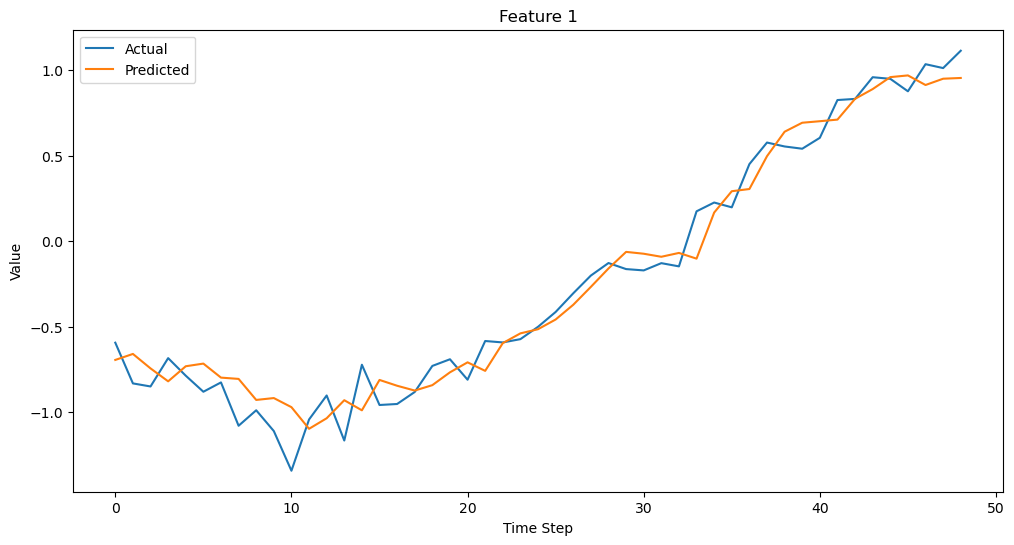

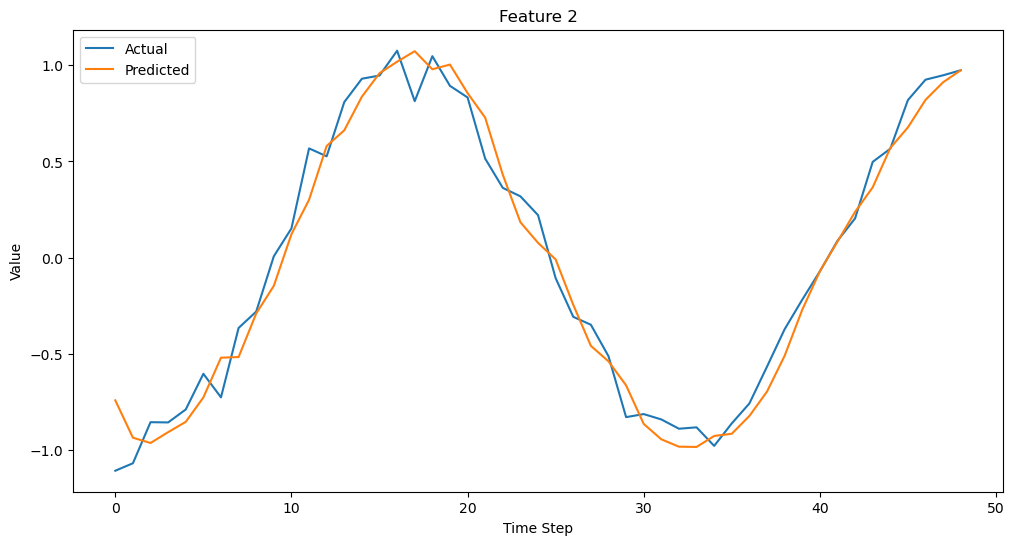

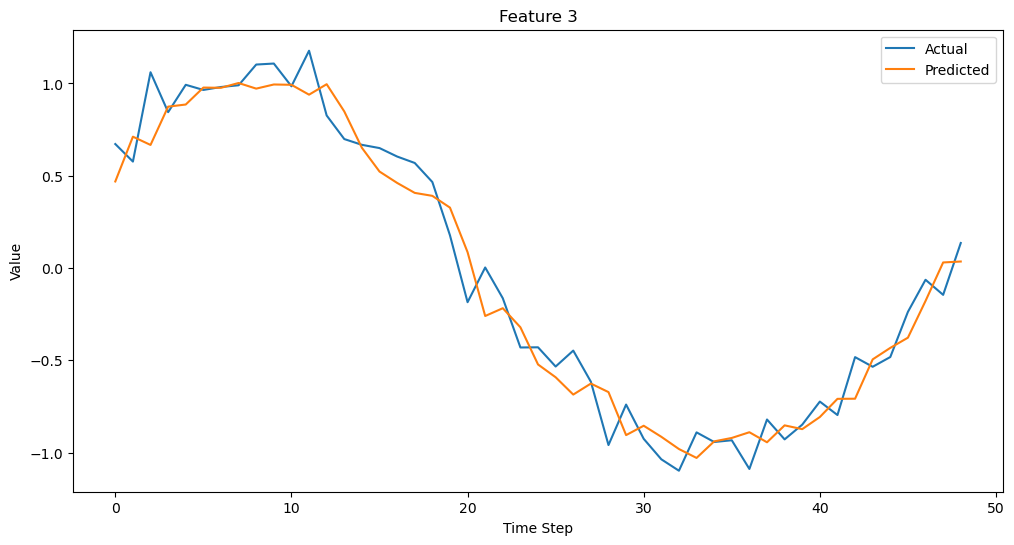

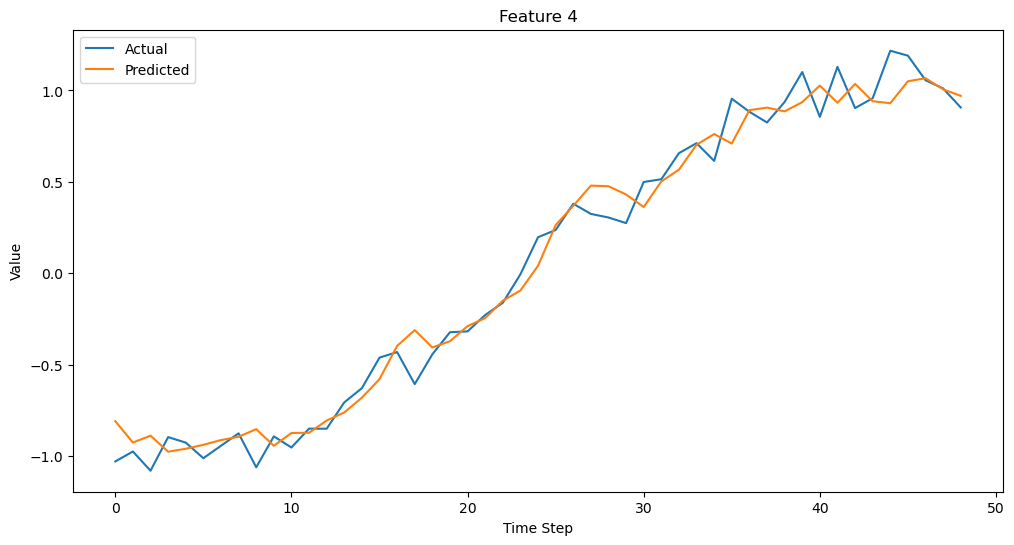

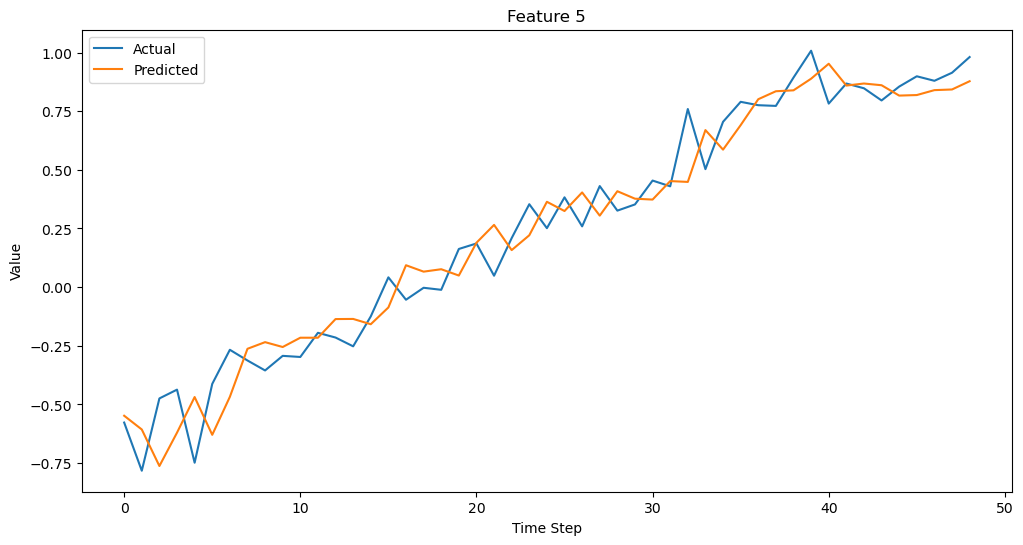

In [43]:
time_steps = range(predicted_sequence.shape[1])  # Sequence length

for feature_idx in range(num_features):
    plt.figure(figsize=(12, 6))
    plt.plot(time_steps, actual_sequence[0, :, feature_idx], label='Actual')
    plt.plot(time_steps, predicted_sequence[0, :, feature_idx], label='Predicted')
    plt.title(f'Feature {feature_idx + 1}')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()  # Plot each feature

##### **Q20: How do you plot the loss curve over the training epochs to analyze the RNN model's learning behavior in PyTorch?**

In [44]:
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0.0
    for x_batch, y_batch in train_dataloader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        batch_size = x_batch.size(0)
        hidden = init_hidden(batch_size)
        optimizer.zero_grad()
        output, hidden = model(x_batch, hidden)
        loss = criterion(output, y_batch)
        loss.backward()
        clip_grad_norm_(model.parameters(), max_norm=5)
        optimizer.step()
        epoch_train_loss += loss.item()
    
    average_train_loss = epoch_train_loss / len(train_dataloader)
    train_losses.append(average_train_loss)
    
    model.eval()
    epoch_val_loss = 0.0
    with torch.no_grad():
        for x_val, y_val in val_dataloader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            batch_size = x_val.size(0)
            hidden = init_hidden(batch_size)
            output, hidden = model(x_val, hidden)
            loss = criterion(output, y_val)
            epoch_val_loss += loss.item()
    average_val_loss = epoch_val_loss / len(val_dataloader)
    val_losses.append(average_val_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {average_train_loss:.4f}, Val Loss: {average_val_loss:.4f}')

Epoch [1/10], Train Loss: 0.0184, Val Loss: 0.0185
Epoch [2/10], Train Loss: 0.0184, Val Loss: 0.0185
Epoch [3/10], Train Loss: 0.0184, Val Loss: 0.0185
Epoch [4/10], Train Loss: 0.0184, Val Loss: 0.0185
Epoch [5/10], Train Loss: 0.0184, Val Loss: 0.0185
Epoch [6/10], Train Loss: 0.0184, Val Loss: 0.0185
Epoch [7/10], Train Loss: 0.0184, Val Loss: 0.0185
Epoch [8/10], Train Loss: 0.0184, Val Loss: 0.0185
Epoch [9/10], Train Loss: 0.0184, Val Loss: 0.0185
Epoch [10/10], Train Loss: 0.0184, Val Loss: 0.0185


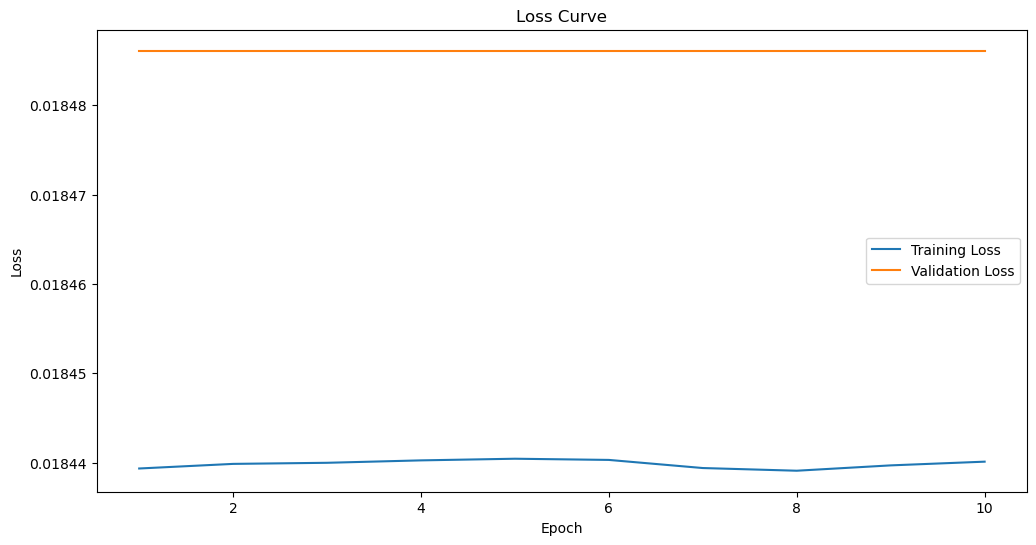

In [45]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Handling long sequences and padding

##### **Q21: How do you handle sequences of varying lengths when training an RNN in PyTorch?**


In [55]:
# 1. Pad the sequences
# 2. Record the original sequence lengths
# 3. Use pack_padded_sequence

from torch.nn.utils.rnn import pad_sequence

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class VariableLengthDataset(Dataset):  # Custom Dataset for variable-length sequences
    def __init__(self, num_sequences=1000, min_length=5, max_length=20, num_features=3):
        self.num_sequences = num_sequences
        self.min_length = min_length
        self.max_length = max_length
        self.num_features = num_features
        self.sequences = []
        self.targets = []
        self._generate_data()
    
    def _generate_data(self):
        for _ in range(self.num_sequences):
            seq_length = np.random.randint(self.min_length, self.max_length + 1)
            t = np.linspace(0, 10, seq_length)
            frequencies = np.random.uniform(0.1, 1.0, size=(self.num_features,))
            phases = np.random.uniform(0, 2 * np.pi, size=(self.num_features,))
            x_seq = np.array([np.sin(f * t + p) for f, p in zip(frequencies, phases)]).T
            noise = np.random.normal(0, 0.1, x_seq.shape)
            x_seq += noise
            x_seq = torch.tensor(x_seq, dtype=torch.float32)
            self.sequences.append(x_seq[:-1])  # Input sequence
            self.targets.append(x_seq[1:])     # Target sequence (next time step)
    
    def __len__(self):
        return self.num_sequences
    
    def __getitem__(self, idx):
        return self.sequences[idx], self.targets[idx]

dataset = VariableLengthDataset()

##### **Q22: How do you pad sequences to ensure they have the same length in a batch when training an RNN in PyTorch?**


In [56]:
# Define a collate function to handle variable-length sequences:
def collate_fn(batch):
    sequences = [item[0] for item in batch]
    targets = [item[1] for item in batch]  # Extract sequences and targets
    
    lengths = torch.tensor([len(seq) for seq in sequences], dtype=torch.long)  # Record original sequence lengths
    
    sequences_padded = pad_sequence(sequences, batch_first=True, padding_value=0.0)
    targets_padded = pad_sequence(targets, batch_first=True, padding_value=0.0)  # Pad sequences and targets
    return sequences_padded, targets_padded, lengths

batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

##### **Q23: How do you use `nn.utils.rnn.pack_padded_sequence` to handle padded sequences in an RNN model in PyTorch?**


In [57]:
# Define an RNN model that can handle packed sequences:
class PackedRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(PackedRNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)
    
    def forward(self, x_packed, hidden):
        packed_output, hidden = self.rnn(x_packed, hidden)  # x_packed is a PackedSequence object
        output_packed = nn.utils.rnn.PackedSequence(
            data=self.fc(packed_output.data),
            batch_sizes=packed_output.batch_sizes,
            sorted_indices=packed_output.sorted_indices,
            unsorted_indices=packed_output.unsorted_indices  # Apply the fully connected layer to the packed data
        )
        return output_packed, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)

In [58]:
input_size = dataset.num_features
hidden_size = 64
num_layers = 2

model = PackedRNNModel(input_size, hidden_size, num_layers).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for sequences_padded, targets_padded, lengths in dataloader:
        lengths, perm_idx = lengths.sort(0, descending=True)  # Sort sequences by lengths in descending order
        sequences_padded = sequences_padded[perm_idx]
        targets_padded = targets_padded[perm_idx]
        
        sequences_padded = sequences_padded.to(device)
        targets_padded = targets_padded.to(device)
        lengths = lengths.to(device)
        
        sequences_packed = nn.utils.rnn.pack_padded_sequence(sequences_padded, lengths.cpu(), batch_first=True, enforce_sorted=True)
        targets_packed = nn.utils.rnn.pack_padded_sequence(targets_padded, lengths.cpu(), batch_first=True, enforce_sorted=True)  # Pack sequences
        
        batch_size = sequences_padded.size(0)
        hidden = model.init_hidden(batch_size)
        
        optimizer.zero_grad()
        
        outputs_packed, hidden = model(sequences_packed, hidden)
        
        loss = criterion(outputs_packed.data, targets_packed.data)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(dataloader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/5], Loss: 0.3294
Epoch [2/5], Loss: 0.1690
Epoch [3/5], Loss: 0.1296
Epoch [4/5], Loss: 0.1235
Epoch [5/5], Loss: 0.1286


##### **Q24: How do you unpack the sequences using `nn.utils.rnn.pad_packed_sequence` after processing them through an RNN in PyTorch?**


In [59]:
from torch.nn.utils.rnn import pad_packed_sequence

outputs_packed, hidden = model(sequences_packed, hidden)  # After forward pass through the model

outputs_padded, _ = pad_packed_sequence(outputs_packed, batch_first=True)  # Unpack the output

##### **Q25: How do you modify the RNN model to correctly handle packed sequences in PyTorch?**

In [60]:
class PackedRNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(PackedRNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, input_size)
    
    def forward(self, x_packed, hidden):
        packed_output, hidden = self.rnn(x_packed, hidden)
        output_packed = torch.nn.utils.rnn.PackedSequence(
            data=self.fc(packed_output.data),
            batch_sizes=packed_output.batch_sizes,
            sorted_indices=packed_output.sorted_indices,
            unsorted_indices=packed_output.unsorted_indices
        )
        return output_packed, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)

input_size = dataset.num_features  # Number of features
hidden_size = 64
num_layers = 2

model = PackedRNNModel(input_size, hidden_size, num_layers).to(device)

In [61]:
import os

if os.path.exists('rnn_model_state_dict.pth'):
    os.remove('rnn_model_state_dict.pth')
    print("File 'rnn_model_state_dict.pth' has been deleted.")
else:
    print("File 'rnn_model_state_dict.pth' does not exist.")

File 'rnn_model_state_dict.pth' has been deleted.
